In [3]:
import utils

In [4]:
import pandas as pd

features = utils.load('features.csv')
#tracks = utils.load('/content/drive/My Drive/tracks.csv')

In [5]:
import pandas as pd

tracks = pd.read_csv('tracks.csv')
tracks.columns = tracks.iloc[0]
tracks = tracks.drop([0, 1])
new_cols = tracks.columns.values
new_cols[0] = 'track_id'
tracks.columns = new_cols
tracks = tracks.reset_index(drop=True)
tracks.head()

/home/daniel/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [6]:
features = features.reset_index()
features.head()

feature    track_id chroma_cens                                          \
statistics             kurtosis                                           
number                       01        02        03        04        05   
0                 2    7.180653  5.230309  0.249321  1.347620  1.482478   
1                 3    1.888963  0.760539  0.345297  2.295201  1.654031   
2                 5    0.527563 -0.077654 -0.279610  0.685883  1.937570   
3                10    3.702245 -0.291193  2.196742 -0.234449  1.367364   
4                20   -0.193837 -0.198527  0.201546  0.258556  0.775204   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            06        07        08        09  ...        04        05   
0           0.531371  1.481593  2.691455  0.866868  ...  0.054125  0.012226   
1           0.067592  1.366848  1.054094  0.108103  ...  0.063831  0.014212   
2           0.880839 -0.923192 -0.927232  0.666617  ...  0.040730  0.012691   
3           0.998411  1.770694  1.604566  0.521217  ...  0.074358  0.017952   
4           0.084794 -0.289294 -0.816410  0.043851  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
0           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
1           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
2           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
3           0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
4           0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
0           2.089872  0.061448  
1           1.716724  0.069330  
2           2.193303  0.044861  
3           3.542325  0.040800  
4           3.189831  0.030993  

[5 rows x 519 columns]

In [7]:
#small = tracks['set', 'subset'] <= 'small'

#train = tracks['set', 'split'] == 'training'
#val = tracks['set', 'split'] == 'validation'
#test = tracks['set', 'split'] == 'test'
import numpy as np


tracks['subset'] = tracks['subset'].astype(str)
tracks['split'] = tracks['split'].astype(str)
tracks['genre_top'] = tracks['genre_top'].astype(str)

y_train = tracks.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'training')]['genre_top']
y_val = tracks.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'validation')]['genre_top']
y_test = tracks.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'test')]['genre_top']
X_train = features.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'training')]['mfcc']
X_test = features.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'test')]['mfcc']
X_val = features.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'validation')]['mfcc']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

6400 training examples, 800 testing examples
140 features, 8 classes


In [8]:
np.unique(y_train)

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype=object)

In [9]:
np.unique(y_test)

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype=object)

In [10]:
import sklearn as skl
import sklearn.preprocessing

X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)
scaler = skl.preprocessing.StandardScaler(copy=False)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

RF = RandomForestClassifier()
ran_for = RF.fit(X_train, y_train)
RF_score = ran_for.score(X_train, y_train)

print("Random Forest Score: " + str(RF_score))

/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Score: 0.99296875


In [11]:
RF_test = ran_for.score(X_val, y_val)

print("Random Forest Score: " + str(RF_test))

Random Forest Score: 0.4525


In [12]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [14]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=8, dtype='int32')
y_val = tf.keras.utils.to_categorical(y_val, num_classes=8, dtype='int32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=8, dtype='int32')

In [15]:
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train[0]

array([-0.22523181, -0.45338181,  0.40686407, -0.12711467,  0.0832777 ,
       -0.36699721, -0.65456896, -0.53287677, -0.51443483, -0.49639243,
        0.17098347,  0.11411216,  0.66632894,  2.09214894,  1.34797479,
        0.11942389,  0.55360107,  0.71199253,  4.13663218,  4.05247313,
        0.91566051,  0.62597671, -0.55880746, -1.34135543, -1.39236275,
       -1.22332363, -1.02467837, -1.14237013, -1.25273333, -0.8270932 ,
        0.14612826,  0.08486021, -0.40468563,  1.47947377,  0.71684398,
        0.38072489,  0.61538206,  0.42030442,  2.24254944,  2.27898357,
        0.16417312,  0.08655967, -0.91328789, -0.81375718, -0.96409979,
       -0.67928352, -1.50988924, -0.9497647 , -1.68141807, -0.75189375,
       -1.68415119, -1.41285163, -1.45857316, -0.86698835, -0.66983148,
       -0.39352314, -0.77294708, -0.94773729, -0.62375284, -0.84089234,
        0.25098007,  0.02972327, -0.87928279, -0.65440687, -0.95088382,
       -0.66292798, -1.55742187, -0.95760126, -1.67684384, -0.75

In [16]:
len(X_train)

6400

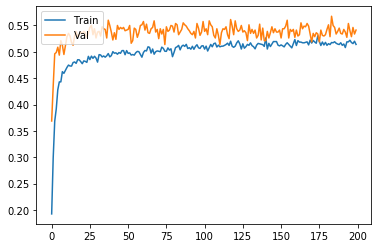

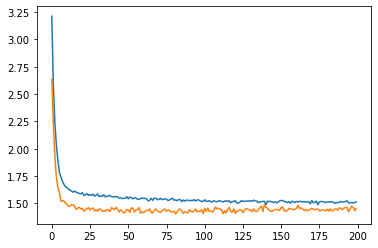

Train:
[1.2946803000569345, 0.5965625047683716]
Val:
[1.4327693367004395, 0.5674999952316284]


In [31]:
import keras
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

activation='relu'
weight_init='glorot_uniform'
optimizer=keras.optimizers.Adam(lr=0.001)
metrics=['accuracy']
epochs = 200
batch_size=None

model = keras.Sequential()
model.add(Dense(50, activation=activation, kernel_regularizer=keras.regularizers.l2(), kernel_initializer=weight_init, input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=activation, kernel_regularizer=keras.regularizers.l2()))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer=optimizer, loss=keras.losses.CategoricalCrossentropy(), metrics=metrics)
mcp_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=0)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0, callbacks=[mcp_save])
plt.plot(history.history['' + metrics[0]])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

best_model = load_model('best_model.hdf5')
print("Train:")
print(best_model.evaluate(X_train, y_train, verbose=2))
print("Val:")
print(best_model.evaluate(X_val, y_val, verbose=2))

In [32]:
X_crossval = np.concatenate((X_train, X_val), axis=0)
y_crossval = np.concatenate((y_train, y_val), axis=0)

In [35]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores=[]

for i, (train_index, val_index) in enumerate(kf.split(X_crossval, y_crossval.argmax(1))):
    x_train_kf, x_val_kf = X_crossval[train_index], X_crossval[val_index]
    y_train_kf, y_val_kf = y_crossval[train_index], y_crossval[val_index]
    
    # create model
    activation='relu'
    weight_init='glorot_uniform'
    optimizer=keras.optimizers.Adam(lr=0.001)
    metrics=['accuracy']
    epochs = 200
    batch_size=None

    model = keras.Sequential()
    model.add(Dense(50, activation=activation, kernel_regularizer=keras.regularizers.l2(), kernel_initializer=weight_init, input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation=activation, kernel_regularizer=keras.regularizers.l2()))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer=optimizer, loss=keras.losses.CategoricalCrossentropy(), metrics=metrics)
    mcp_save = ModelCheckpoint('best_model_cv.hdf5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=0)
    history = model.fit(x_train_kf, y_train_kf, validation_data=(x_val_kf, y_val_kf), epochs=epochs, verbose=0, callbacks=[mcp_save])
    
    # evaluate the model
    model = load_model('best_model_cv.hdf5')
    scores = model.evaluate(x_val_kf, y_val_kf, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 53.33%
accuracy: 53.54%
accuracy: 56.18%
accuracy: 53.26%
accuracy: 54.65%
54.19% (+/- 1.11%)


### On test set

In [36]:
model.evaluate(X_test, y_test, verbose=2)

[1.7336268329620361, 0.4449999928474426]